In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

# Week 11 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


with contributions totally ripped off from Federica Bianco (Delaware) and Gautham Narayan (UIUC)

## Deep Learning

# Where do we stand?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning

<table>
<thead>
  <tr>
    <th>Method</th>
    <th>Unsupervised</th>
    <th>Supervised</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Centroid-based</td>
    <td>k-Means</td>
    <td>kNN w/ k=1 (aka Nearest Centroid) </td>
  </tr>
  <tr>
    <td>Linkage-based Model</td>
    <td>Hierarchical Clustering</td>
    <td>Decision Trees/Random Forests</td>
  </tr>
  <tr>
    <td>Parametric Density Model</td>
    <td>GMMs, Extreme Deconvolution</td>
    <td>Gaussian Naive Bayes, LDA, QDA</td>
  </tr>
  <tr>
    <td>Nonparametric Density/Locally Weighted*</td>
    <td>DBSCAN/Optics</td>
      <td>kNN with k>1, <strong>SVM, MLPs, DNN</strong></td>
  </tr>
</tbody>
</table>

* = KDEs are perfectly useable in either column

<img src="figures/mindmap.jpg">

<img src="figures/perceptron1.png">

<img src="figures/perceptron2.png">

<img src="figures/perceptron3.png">

## OK, but how do we get the weights when this is linear regression, but the output is binary (0, 1)

### Recall the discriminant function from Monday:


## $$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl} 1 & \mbox{if $g(x) > \theta$}, \\ 0 & \mbox{otherwise,} \end{array} \right. \end{eqnarray}$$

Where $\theta$ is the **threshold**

We compare the output vector $y$ to the target/truth $t$ and we want to minimize the error

## $$ E = 1/2 \cdot (t-y)^2$$

To minimize the error, we need to change the weights of the inputs to get $t$ close to $y$.

Let's do this with our old friend, **gradient descent**

## $$w_i = w'_i - \eta \cdot \frac{dE}{dw_i} $$

Where $\eta$ is some constant that we'll call the **learning rate**

## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{dy}{dw_i} $$

## $$\frac{dy}{dw_i} = x_i $$

so..

## $$w_i = w'_i + \eta \cdot (t-y) \cdot x_i $$


If $y != t$ (and remember the t is just a 0 or 1):
## $$ w_{\text{new}}  = w_{\text{old}} + \eta \cdot t \cdot x$$

and $y == t$, don't update

<img src="figures/perceptron4.png">

<img src="figures/perceptron5.png">

<img src="figures/perceptron6.png">

- The Rosenblatt Perceptron uses the class labels to learn model coefficients

- The Adaline Neuron uses continuous predicted values (from the net input) to learn the model coefficients, which is more “powerful” since it tells us by “how much” we were right or wrong
    - the weights are how sensitive a neuron is 
    - the activation function turns neurons on/off 
    - The loss function of the network is updated to penalize models in proportion to the magnitude of their activation
    - prevents updating weights when y gets close to t - i.e. prevents overfitting!

    
## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{df(y)}{dw_i} $$

<img src="figures/adaline_vs_perceptron.png">

<img src="figures/activation_functions.png">

<img src='figures/dl4.png'>

<img src='figures/dl5.png'>

## In-not actually class-class exercise:

https://jalammar.github.io/feedforward-neural-networks-visual-interactive/

<img src="figures/mlp1.png">

<img src="figures/mlp2.png">

## Why have one hidden layer when you can have two for twice the price!

<img src="figures/dnn1.png">

<img src="figures/dnn2.png">

<img src='figures/fig-dl2.png'>

# Types of neural networks
## - "Neural Network Zoo" (Asimov Institute)
<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">


This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usable thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).
Many image processing tasks involve convolving an image with a 2-dimensional kernel as shown below.
![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)

The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration! Serious work using neural networks is almost always done usign specialized GPU-accelerated platforms.

# Deep learning frameworks

## - Python(-compatible) - like sklearn only for NN models:
- Tensorflow (Google)
- Keras (frontend for TensorFlow + Theano)
- Theano (Université de Montréal)
- Caffe (UC Berkeley)
- CNTK (Microsoft)
- MXNet (Amazon+Baidu+...)

# In-class warm-up: Implementing a simple MLP Classifier with `sklearn`

Our neural network will take an $\mathbf{x} = (x_1, x_2)$ vector as input and output a $K$-dimensional vector $\mathbf{p}=(p_1,\dots,p_K)$ of class probabilities. For simplicity we'll focus on a single choice of activation function, the ReLU function $f(x) = \max(x, 0)$.

In [1]:
# Imports / plotting configuration
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['image.interpolation'] = 'nearest'  # hard classification boundaries
plt.rcParams['image.cmap'] = 'viridis'
np.random.seed(13)

In [2]:
# Generate spiral sample data
# N = num points
# K = num spiral arms
# sigma = some noise
def spiral_data(N, K=3, sigma=0.1):
    X = np.zeros((N * K, 2))
    y = np.zeros(N * K, dtype='int')

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        theta = 2 * np.pi * j / K + np.linspace(0, 3 * np.pi, N) + np.random.randn(N) * sigma
        X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
        y[ix] = j
        
    return X, y

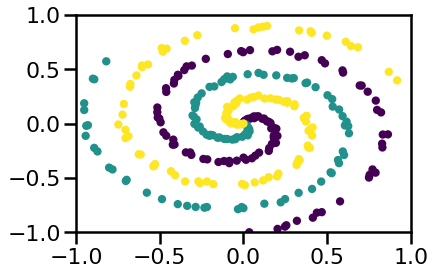

In [3]:
N = 100
K = 3
X, y = spiral_data(N, K, 0.1)

# Visualize the generated data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SingleLayerReLU(BaseEstimator, ClassifierMixin):
    """Skeleton code for single-layer multi-class neural network classifier w/ ReLU activation.
    NOTE: Whenever you change the code below, you need to re-run this cell AND re-initialize
    your model (`model = SingleLayerNet(...)`) in order to update your specific `model` object.
    """
    def __init__(self, hidden_size, num_classes, sigma_init=0.01):
        """Initialize weights with Gaussian noise scaled by `sigma_init` and
        biases with zeros.
        """
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.W1 = sigma_init * np.random.randn(hidden_size, 2)
        self.W2 = sigma_init * np.random.randn(num_classes, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.b2 = np.zeros(num_classes)
    
    def loss(self, y, P):
        """Compute total softmax loss.
        Inputs:  y -> (N,) array of true (integer) labels
                 p -> (N, K) array of predicted probabilities
        Outputs: L -> total loss value       
        """
        return -np.sum(np.log(P[range(len(P)), y]))
        
    def dloss(self, X, y):
        """Compute gradient of softmax loss with respect to network weights.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
        Outputs: dW1 -> (hidden_size, 2) array of weight derivatives
                 dW2 -> (hidden_size, 2) array of weight derivatives
                 db1 -> (hidden_size,) array of bias derivatives
                 db2 -> (hidden_size,) array of bias derivatives
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

        dZ = P
        dZ[range(len(X)), y] -= 1

        dW2 = (H.T @ dZ).T
        db2 = np.sum(dZ, axis=0)

        dH = dZ @ self.W2
        dH[H <= 0] = 0  # backprop ReLU  activation

        dW1 = (X.T @ dH).T
        db1 = np.sum(dH, axis=0)
        
        return (dW1, dW2, db1, db2)

    def predict_proba(self, X):
        """Compute forward pass for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        
        return P
        
    def predict(self, X):
        """Compute most likely class labels for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        P = self.predict_proba(X)
        return np.argmax(P, 1)
        
    def fit(self, X, y, step_size=3e-3, n_iter=10000):
        """Optimize model parameters W1, W2, b1, b2 via gradient descent.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
                 step_size -> gradient descent step size
                 n_iter -> number of gradient descent steps to perform
        Outputs: losses -> (n_iter,) array of loss values after each step
        """
        losses = np.zeros(n_iter + 1)
        for i in range(0, n_iter + 1):
            dW1, dW2, db1, db2 = self.dloss(X, y)
            self.W1 -= step_size * dW1
            self.W2 -= step_size * dW2
            self.b1 -= step_size * db1
            self.b2 -= step_size * db2
            
            P = self.predict_proba(X)
            losses[i] = self.loss(y, P)
            
            if i % 1000 == 0:
                print("Iteration {}: loss={}".format(i, losses[i]))
        return losses

In [5]:
def visualize_predictions(model, X, y, step=0.02):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Accuracy: {}%".format(100 * np.mean(y == model.predict(X))))

In [ ]:
model = SingleLayerReLU(...
visualize_predictions(model, X, y)

In [ ]:
model = SingleLayerReLU(...
losses = model.fit(...
plt.plot(losses, '-')
plt.xlabel('Iteration')
plt.ylabel('Total loss');
plt.figure()

In [ ]:
visualize_predictions(model, X, y)

In [ ]:
from sklearn.neural_network import MLPClassifier

X, y = spiral_data(100, 5, 0.1)
single_layer_model = MLPClassifier(...
single_layer_model.fit(X, y)

In [ ]:
visualize_predictions(single_layer_model, X, y)

In [ ]:
X, y = spiral_data(100, 3, 0.1)
multi_layer_model = MLPClassifier(...
multi_layer_model.fit(...
visualize_predictions(multi_layer_model, X, y)

In [ ]:
# you can view the activations of the final layer if needed

from copy import deepcopy

X, y = spiral_data(100, 2, 0.1)
multi_layer_model = MLPClassifier(...
multi_layer_model.fit(...
visualize_predictions(multi_layer_model, X, y)

def visualize_activations(model, unit, X, y, step=0.02):
    """Visualize activations of ith neuron of last layer."""
    model = deepcopy(model)
    model.coefs_[-1][:unit] = 0  # zero out other units
    model.coefs_[-1][unit] = 1  # just want the activation function
    model.coefs_[-1][(unit + 1):] = 0  # zero out other units
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
fig, ax = plt.subplots(3, 2, figsize=(14, 20))
for i in range(len(multi_layer_model.coefs_[-1])):
    plt.sca(ax.ravel()[i])
    visualize_activations(multi_layer_model, i, X, y)

# Demo for later
## [http://playground.tensorflow.org](http://playground.tensorflow.org/#dataset=spiral)

# In-class exercise: Implementing a simple MLP Regressor with `sklearn`

### Predict house prices in Boston with an MLP regressor
### Use `cross_val_predict` to see how well you do after 5-fold cross-validation


In [13]:
#Execute this cell 

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
print(boston.DESCR)

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
## YOUR CODE HERE
clf = MLPRegressor(...
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred, marker='.', color='k')
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

In [ ]:
# You can get the coefficients/weights of each layer if you need
[coef.shape for coef in clf.coefs_]
clf.coefs_

# Appendix: And now for biology!!

<img src="figures/bioneuron.png">

Signals are responses to stimuli caused by changing the balanace of Na+ and K+ ions within the Axon (which in turn changes the bias voltage between the terminal and dendrite) - allows a signal to be transmitted down the axon.

<img src="figures/neuronal_action_potential.jpg">

<img src="figures/Action_Potential_Propagation_Along_Axon_Animation.gif">

<img src="figures/myelinated-axon.gif">

If this is interesting, you can look at a more detailed explanation here: https://www.getbodysmart.com/nervous-system/action-potential-events

<img src="figures/McCulloughPitts1943.png">

<img src="figures/bioneuron2.png" width="600px">

<img src="figures/mp_neuron.png">

<img src="figures/mk1_perceptron.jpg">

<img src="figures/1960_preceptron.png">

<img src="figures/Mark_I_perceptron.jpeg">